In [ ]:
We want to see the distrubtion of the dataset over the entire run, this is a converted csv file from plain textfile

In [13]:
import torch
import cv2 
import os
import pandas as pd 

from PIL import Image


class ConvertToCsv: 
    def __init__(self, merge_folder, csv_folder): 
        self.merge_folder = merge_folder 
        self.csv_folder = csv_folder 
    
    def convert(self): 
        idx = 0
        if os.path.exists(self.merge_folder + "merged_log_file.txt") == False: 
            return

        dic = {}
        df = pd.DataFrame(dic, columns=["count", "time", "front_image", "left_image", "right_image", "steering"])
        df.to_csv(self.csv_folder + "logging_data_csv.csv", header=True)

        txt_file = open(self.merge_folder + "merged_log_file.txt")
        for line in txt_file: 
            objects = line.split(" ")

            time = objects[0]
            frnt_cam = objects[1]
            left_cam = objects[2]
            right_cam = objects[3]
            steering = objects[4]

            dic = {
                "count": [int(idx)],
                "time": [time], 
                "front_image": [frnt_cam], 
                "left_image": [left_cam], 
                "right_image": [right_cam],
                "steering": [float(steering)] 
            }

            df = pd.DataFrame(dic, columns=["count", "time", "front_image", "left_image", "right_image", "steering"])
            df.to_csv(self.csv_folder + "logging_data_csv.csv", header=False, mode="a")

            idx += 1
            
            
if __name__ == '__main__': 
    csv_manager = ConvertToCsv("/Volumes/joeham/logging_camera_down/", "/Volumes/joeham/logging_camera_down/")
    csv_manager.convert()

/var/folders/bc/84030qgn4dq7016czb8jvnh40000gn/T/ipykernel_58120/3849608591.py:30: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.39344262295081966' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[idx, "steering"] = (2.0 * ((val - minimum) / (maximum - minimum)) - 1.0)


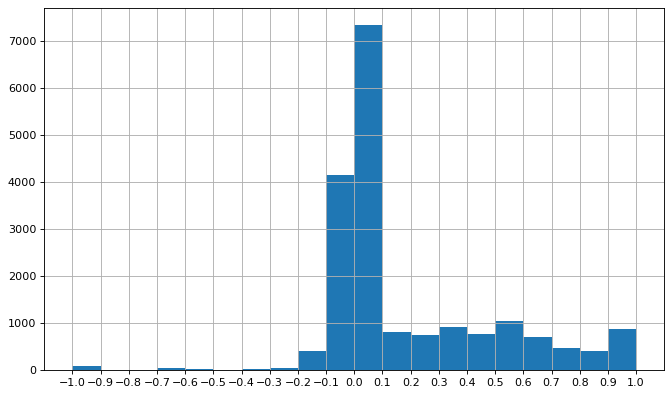

In [18]:
import matplotlib.pyplot as plt
import pandas as pd 
import os 

def visualize_data(file_name: str) -> None: 
    df = pd.read_csv(file_name) 
    df = normalize_data(df) 

    plt.figure(figsize=(10,6), dpi=80)
    df.get("steering").hist(bins=20)
    plt.xticks(
        ticks=[-1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 
            0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
    plt.show() 
    
def normalize_data(df: pd.DataFrame) -> pd.DataFrame: 
    ''' 
        Convert the DataFrame values and normalize the dataset between -1 and 1 

        @paramters: 
            pd.DataFrame
        @return: 
            pd.DataFrame 
    ''' 
    minimum = df.get("steering").min()
    maximum = df.get("steering").max()

    idx = 0 
    for val in df.get("steering"):
        df.at[idx, "steering"] = (2.0 * ((val - minimum) / (maximum - minimum)) - 1.0)
        idx += 1
    
    return df

if __name__ == '__main__': 
    visualize_data("/Volumes/joeham/logging_camera_down/logging_data_csv.csv") 

In [ ]:
Now we want to prepare to oversample the steering from 0.1 to 1.0, as values -1.0 between 0.1 are overrepresented within the dataset. 

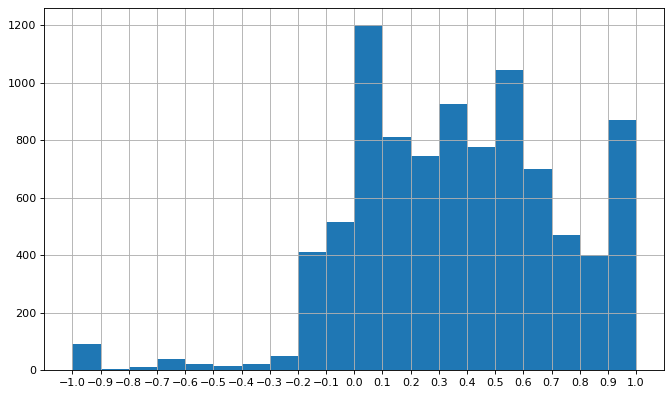

In [44]:
import matplotlib.pyplot as plt
import pandas as pd 
import os 

from imblearn.over_sampling import RandomOverSampler

def visualize_data(file_name: str) -> None: 
    df = pd.read_csv(file_name, index_col=False) 
    df = normalize_data(df) 

    df = remove_oversampled_data(df)
    
    pd.to_csv("/Volunormalized_csv.csv", index=False) 
    
    plt.figure(figsize=(10,6), dpi=80)
    df.get("steering").hist(bins=20)
    plt.xticks(
        ticks=[-1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 
            0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
    plt.show() 

def remove_oversampled_data(df: pd.DataFrame) -> pd.DataFrame: 
    MAX_IMAGES = 1200 
    
    value_0_1_neg = 0 
    value_0_1 = 0

    indices_to_drop = [] 

    idx = 0 
    for val in df.get("steering"):
        is_remove = False

        # Add up any images where the steering is "forward" or "-0.1" between "0.1". After 2000 images, prevent the other images from enter the
        # DataFrame
        if -0.1 < val < 0.0: 
            value_0_1_neg += 1 
            is_remove = True
        if 0.0 <= val < 0.1: 
            value_0_1 += 1 
            is_remove = True

        if is_remove == True and value_0_1_neg > MAX_IMAGES: 
            indices_to_drop.append(idx) 
        if is_remove == True and value_0_1 > MAX_IMAGES: 
            indices_to_drop.append(idx) 

        idx += 1
    df.drop(indices_to_drop, inplace=True)  
            
    return df
          
    
    
def normalize_data(df: pd.DataFrame) -> pd.DataFrame: 
    ''' 
        Convert the DataFrame values and normalize the dataset between -1 and 1 

        @paramters: 
            pd.DataFrame
        @return: 
            pd.DataFrame 
    ''' 
    minimum = df.get("steering").min()
    maximum = df.get("steering").max()

    idx = 0 
    for val in df.get("steering"):
        df.at[idx, "steering"] = (2.0 * ((val - minimum) / (maximum - minimum)) - 1.0)
        idx += 1
    
    return df

if __name__ == '__main__': 
    visualize_data("/Volumes/joeham/logging_camera_down/logging_data_csv.csv") 